## Hypothesis Generation

1. Items with less weight have higher sales
2. The higher the visibility of an item the higher the sale
3. The older the store the higher the sales
4. Tier 1 cities  have higher sales compared to the stores in tier 2 and 3
5. Bigger stores make more sales compared to the smaller stores
6. Lower cost products have higher sales compared to expensive items

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
#load datasets
train_df =pd.read_csv('bundas_train.csv')
test_df = pd.read_csv("bundas_test.csv")

## Exploratory Data Analysis and Data Cleaning

In [3]:
train_df.head()

,Item_ID,Weight,FatContent,Visibility,Category,Max_Price,Store_ID,Store_Establishment_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train_df.shape

(8523, 12)

In [5]:
train_df.columns

Index(['Item_ID', 'Weight', 'FatContent', 'Visibility', 'Category',
       'Max_Price', 'Store_ID', 'Store_Establishment_Year', 'Store_Size',
       'Store_Location_Type', 'Store_Type', 'Item_Store_Sales'],
      dtype='object')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_ID                     8523 non-null object
Weight                      7060 non-null float64
FatContent                  8523 non-null object
Visibility                  8523 non-null float64
Category                    8523 non-null object
Max_Price                   8523 non-null float64
Store_ID                    8523 non-null object
Store_Establishment_Year    8523 non-null int64
Store_Size                  6113 non-null object
Store_Location_Type         8523 non-null object
Store_Type                  8523 non-null object
Item_Store_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [7]:
train_df.isnull().any()

Item_ID                     False
Weight                       True
FatContent                  False
Visibility                  False
Category                    False
Max_Price                   False
Store_ID                    False
Store_Establishment_Year    False
Store_Size                   True
Store_Location_Type         False
Store_Type                  False
Item_Store_Sales            False
dtype: bool

In [8]:
train_df.isnull().sum()

Item_ID                        0
Weight                      1463
FatContent                     0
Visibility                     0
Category                       0
Max_Price                      0
Store_ID                       0
Store_Establishment_Year       0
Store_Size                  2410
Store_Location_Type            0
Store_Type                     0
Item_Store_Sales               0
dtype: int64

In [9]:
train_df.dtypes

Item_ID                      object
Weight                      float64
FatContent                   object
Visibility                  float64
Category                     object
Max_Price                   float64
Store_ID                     object
Store_Establishment_Year      int64
Store_Size                   object
Store_Location_Type          object
Store_Type                   object
Item_Store_Sales            float64
dtype: object

In [10]:
#imputing missing values of train data with mean and mode
Weight=train_df['Weight']
Weight_mean=Weight.mean()
Weight.fillna(Weight_mean, inplace=True)
train_df['Store_Size'] =train_df['Store_Size'].fillna(train_df['Store_Size'].mode().iloc[0])


In [11]:
train_df.isnull().sum()

Item_ID                     0
Weight                      0
FatContent                  0
Visibility                  0
Category                    0
Max_Price                   0
Store_ID                    0
Store_Establishment_Year    0
Store_Size                  0
Store_Location_Type         0
Store_Type                  0
Item_Store_Sales            0
dtype: int64

In [12]:
test_df.isnull().sum()

Item_ID                        0
Weight                       976
FatContent                     0
Visibility                     0
Category                       0
Max_Price                      0
Store_ID                       0
Store_Establishment_Year       0
Store_Size                  1606
Store_Location_Type            0
Store_Type                     0
dtype: int64

In [13]:
#imputing missing values of test data with mean and mode
Weight=test_df['Weight']
Weight_mean=Weight.mean()
Weight.fillna(Weight_mean, inplace=True)
test_df['Store_Size'] =test_df['Store_Size'].fillna(test_df['Store_Size'].mode().iloc[0])

In [14]:
test_df.isnull().sum()

Item_ID                     0
Weight                      0
FatContent                  0
Visibility                  0
Category                    0
Max_Price                   0
Store_ID                    0
Store_Establishment_Year    0
Store_Size                  0
Store_Location_Type         0
Store_Type                  0
dtype: int64

In [15]:
test_df.dtypes

Item_ID                      object
Weight                      float64
FatContent                   object
Visibility                  float64
Category                     object
Max_Price                   float64
Store_ID                     object
Store_Establishment_Year      int64
Store_Size                   object
Store_Location_Type          object
Store_Type                   object
dtype: object

In [16]:
test_df.shape

(5681, 11)

In [17]:
train_df.describe().round(2)

,Weight,Visibility,Max_Price,Store_Establishment_Year,Item_Store_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [18]:
test_df.describe().round(2)

,Weight,Visibility,Max_Price,Store_Establishment_Year
count,5681.00,5681.00,5681.00,5681.00
mean,12.70,0.07,141.02,1997.83
std,4.25,0.05,61.81,8.37
min,4.56,0.00,31.99,1985.00
25%,9.20,0.03,94.41,1987.00
50%,12.70,0.05,141.42,1999.00
75%,15.85,0.09,186.03,2004.00
max,21.35,0.32,266.59,2009.00


In [19]:
#Combine test and train into one file
train_df['origin']='train'
test_df['origin']='test'
Full_df = pd.concat([train_df, test_df], ignore_index=True, sort=False)

In [20]:
Full_df["FatContent"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: FatContent, dtype: int64

In [21]:
#changing LF & low fat to Low Fat; And reg to Regular in the train data.
Full_df["FatContent"].where((Full_df["FatContent"] == "Low Fat") | (Full_df["FatContent"] == "Regular") | 
                                (Full_df["FatContent"] == "reg"), "Low Fat", inplace=True)
Full_df["FatContent"].where((Full_df["FatContent"] == "Regular") | (Full_df["FatContent"] == "Low Fat"), "Regular", inplace=True)
Full_df["FatContent"].value_counts()

Low Fat    9185
Regular    5019
Name: FatContent, dtype: int64

In [22]:
Full_df.Category.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Category, dtype: int64

In [23]:
Full_df.Store_ID.value_counts()

OUT027    1559
OUT013    1553
OUT035    1550
OUT046    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Store_ID, dtype: int64

In [24]:
Full_df.Store_Size.value_counts()

Medium    8671
Small     3980
High      1553
Name: Store_Size, dtype: int64

In [25]:
Full_df.Store_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Store_Location_Type, dtype: int64

In [26]:
Full_df.Store_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Store_Type, dtype: int64

## Data Visualization

Text(0.5, 1, 'Correlation Heatmap')

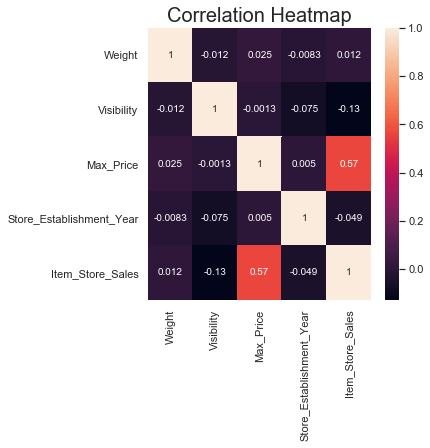

In [27]:
corr = train_df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap', fontsize=20)

Maximum price is has strongest positive correlation with sales, while visibilty has a small negative correlation with sales

## Category

Text(0, 0.5, 'Frequency')

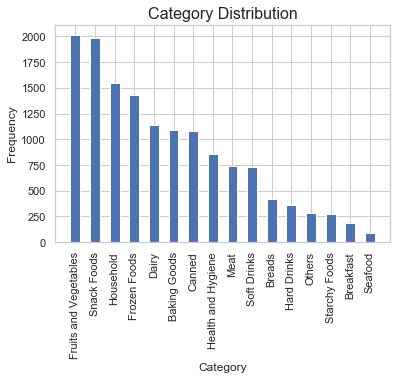

In [28]:
plt.bar(Full_df['Category'].value_counts().index, Full_df['Category'].value_counts(), width=0.5, bottom=None, align='center', data=Full_df)
plt.title('Category Distribution', fontsize=16)
plt.xticks(rotation='vertical')
plt.xlabel('Category')
plt.ylabel('Frequency')


most items being sold are Fruits and vegetables 

In [29]:
Full_df['Category_Type'] = Full_df['Item_ID'].str[:2]
Full_df['Category_Type'] = Full_df['Category_Type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
count=Full_df['Category_Type'].value_counts()
count

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Category_Type, dtype: int64

Text(0, 0.5, 'Frequency')

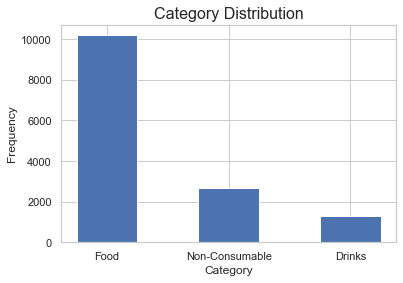

In [30]:
plt.bar(Full_df['Category_Type'].value_counts().index, Full_df['Category_Type'].value_counts(), width=0.5, bottom=None, align='center', data=Full_df)
plt.title('Category Distribution', fontsize=16)
plt.xlabel('Category')
plt.ylabel('Frequency')


In [31]:
sales_by_Category = Full_df.groupby(["Category"])['Item_Store_Sales'].sum()
sales_by_Category

Category
Baking Goods             1.265525e+06
Breads                   5.532372e+05
Breakfast                2.322990e+05
Canned                   1.444151e+06
Dairy                    1.522594e+06
Frozen Foods             1.825735e+06
Fruits and Vegetables    2.820060e+06
Hard Drinks              4.577934e+05
Health and Hygiene       1.045200e+06
Household                2.055494e+06
Meat                     9.175656e+05
Others                   3.255176e+05
Seafood                  1.488682e+05
Snack Foods              2.732786e+06
Soft Drinks              8.928977e+05
Starchy Foods            3.514013e+05
Name: Item_Store_Sales, dtype: float64

Text(0.5, 0, 'Sales')

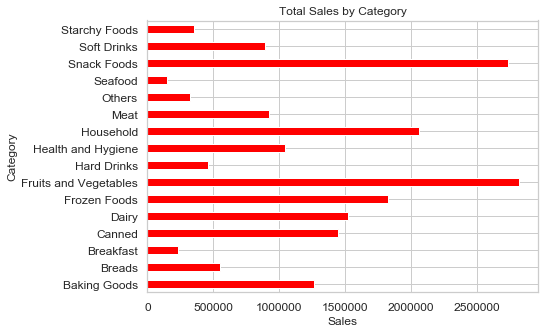

In [32]:
sales_by_Category.plot.barh(figsize=(7,5), title="Total Sales by Category", color="red", fontsize=12)
plt.ylabel('Category')
plt.xlabel('Sales')

Fruits and vegetables have the highest number of sales

Text(0.5, 0, 'Store Type')

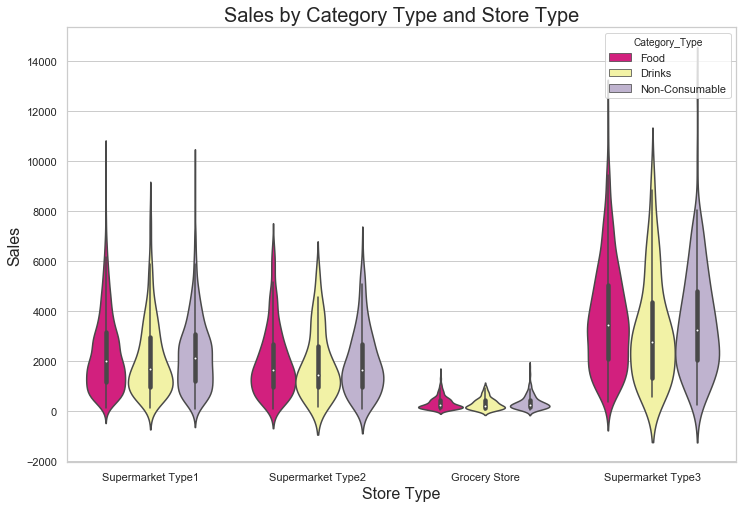

In [33]:
plt.figure(figsize=(12,8))
sns.violinplot(x='Store_Type', y='Item_Store_Sales', hue='Category_Type', data=Full_df, palette="Accent_r", ylim=(1,6))
plt.title('Sales by Category Type and Store Type', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store Type', fontsize=16)

Food products in supermarket type 3 have the highest sales

## Maximum Price

In [34]:
#Maximum price by category
listing_price_by_category = Full_df.groupby(["Category"])['Max_Price'].mean()
listing_price_by_category


Category
Baking Goods             127.458237
Breads                   141.389849
Breakfast                137.985444
Canned                   138.620936
Dairy                    147.230998
Frozen Foods             136.467385
Fruits and Vegetables    144.304237
Hard Drinks              137.295031
Health and Hygiene       133.108079
Household                148.736501
Meat                     140.291141
Others                   133.745047
Seafood                  141.288751
Snack Foods              146.460309
Soft Drinks              135.403726
Starchy Foods            149.751917
Name: Max_Price, dtype: float64

Text(0, 0.5, 'Maximum Price')

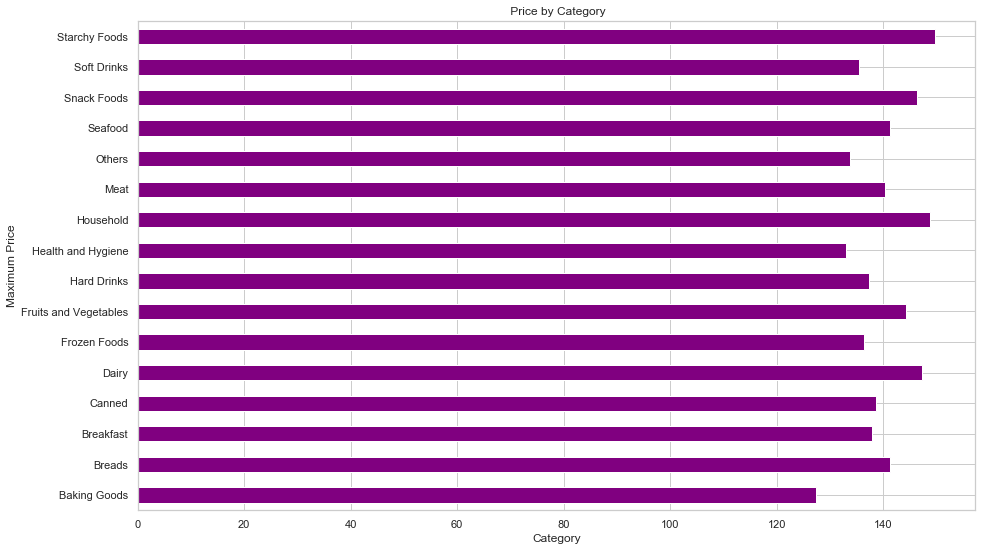

In [35]:
listing_price_by_category.plot.barh(figsize=(15,9), title=" Price by Category",color='purple')
plt.xlabel('Category')
plt.ylabel('Maximum Price')

Starchy food items have the highest price

Text(0.5, 0, 'Store Type')

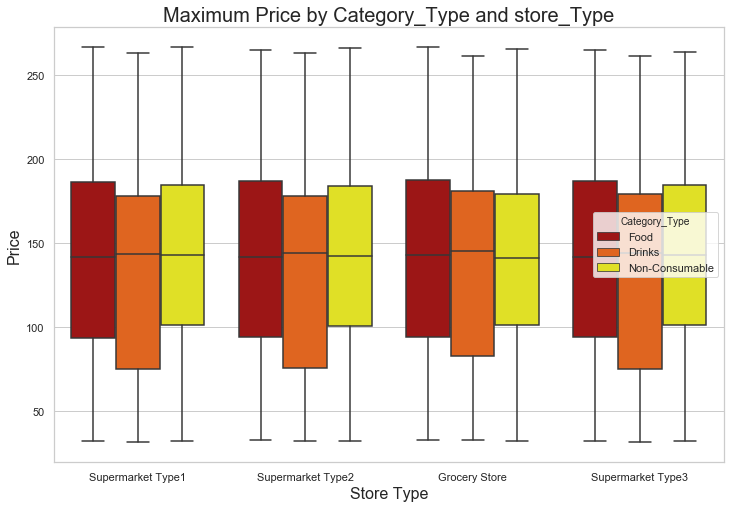

In [36]:
#Maximum Price by Category and Store Type
plt.figure(figsize=(12,8))
sns.boxplot(x='Store_Type', y='Max_Price', hue='Category_Type', data=Full_df, palette='hot')
plt.title('Maximum Price by Category_Type and store_Type', fontsize=20)
plt.ylabel('Price', fontsize=16)
plt.xlabel('Store Type', fontsize=16)

The prices of food drinks and non consumable goods is equal across different store types

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'price_vs_sales_scatterplot')

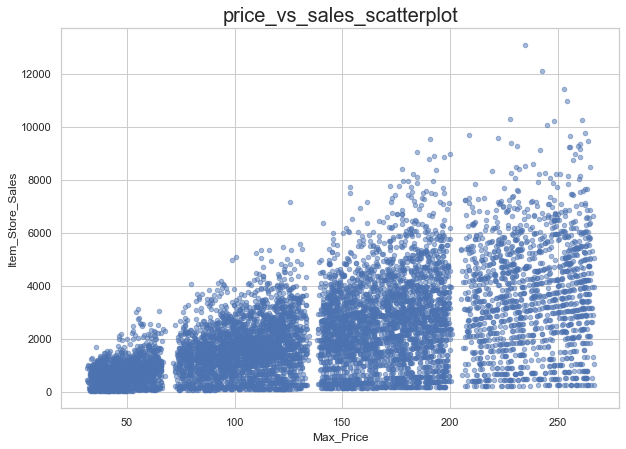

In [37]:
Full_df.plot(kind="scatter", x="Max_Price", y="Item_Store_Sales",
             alpha=0.5, figsize=(10, 7))
plt.title('price_vs_sales_scatterplot', fontsize=20)

As the price points incresase so do the sales

## Fat Content

In [38]:
#Mark non-consumables as separate category in low_fat:
Full_df.loc[Full_df['Category_Type']=="Non-Consumable",'FatContent'] = "Non-Edible"
Full_df['FatContent'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: FatContent, dtype: int64

Text(0, 0.5, 'Frequency')

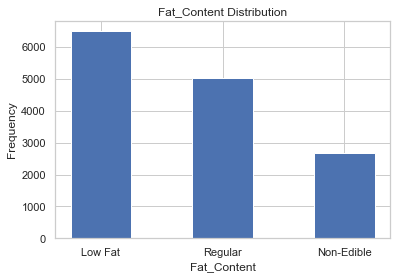

In [39]:
plt.bar(Full_df['FatContent'].unique(), Full_df['FatContent'].value_counts(), width=0.5, bottom=None, align='center', data=Full_df)
plt.title('Fat_Content Distribution')
plt.xlabel('Fat_Content')
plt.ylabel('Frequency')


Text(0.5, 0, 'Store Type')

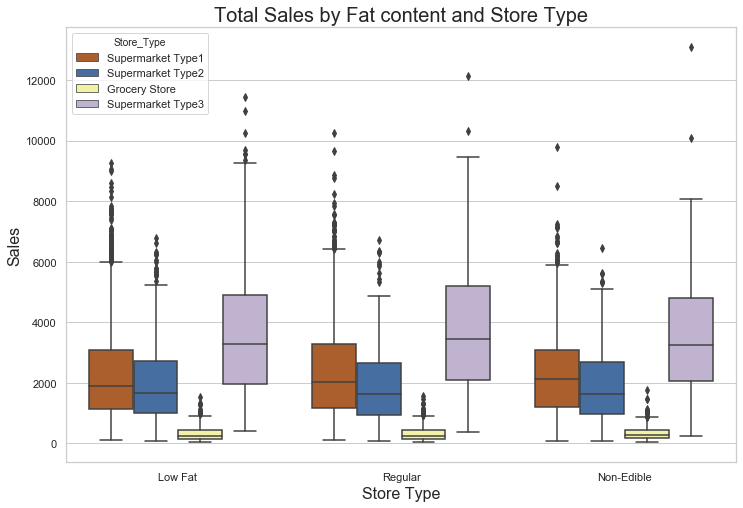

In [40]:
plt.figure(figsize=(12,8))

sns.boxplot(x='FatContent', y='Item_Store_Sales', hue='Store_Type', data=Full_df, palette="Accent_r")
plt.title('Total Sales by Fat content and Store Type', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store Type', fontsize=16)

## Visibility

In [41]:
Full_df['Visibility'].value_counts().head(3)


0.000000    879
0.076841      3
0.077011      3
Name: Visibility, dtype: int64

In [42]:
#The column 'Visibility' has lots of 0 values I will fill values with the mean value
#Full_df['Visibility'].mask(Full_df['Visibility']== 0,Full_df['Visibility'].mean(),inplace=True)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'visibility_vs_sales_scatterplot')

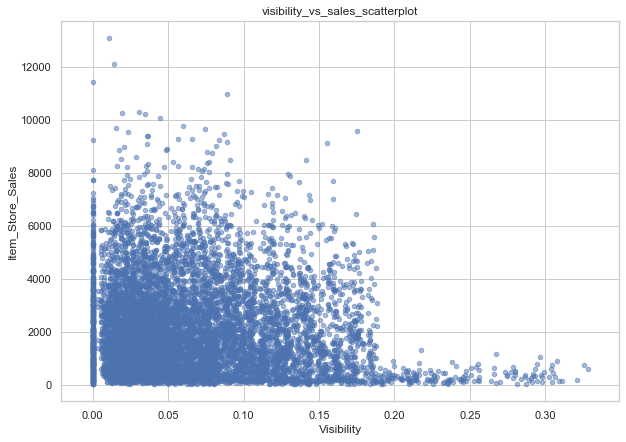

In [43]:
Full_df.plot(kind="scatter", x="Visibility", y="Item_Store_Sales",
             alpha=0.5, figsize=(10, 7))
plt.title('visibility_vs_sales_scatterplot')


Some items have almost no visibility but a large amount of sales.
As visibility goes beyond 20%, sales reduce. 

In [44]:
zero_vis_sales = Full_df[(Full_df["Visibility"] == 0)]

Text(0.5, 1.0, 'zero_visibility_sales_by_fat_content')

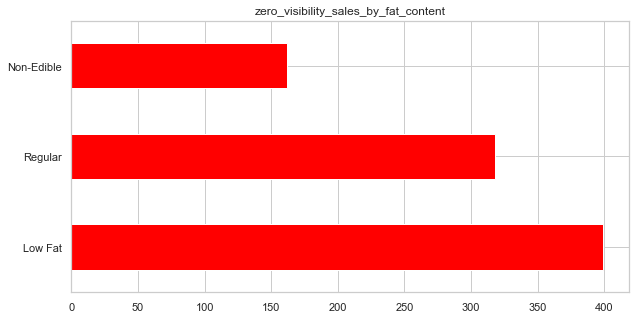

In [45]:
zero_vis_sales["FatContent"].value_counts().plot.barh(figsize=(10, 5), title='Zero Visibility Sales by Fat Content', color='red')
plt.title("zero_visibility_sales_by_fat_content")

Low fat products with zero visibility sell better than regular fat products.

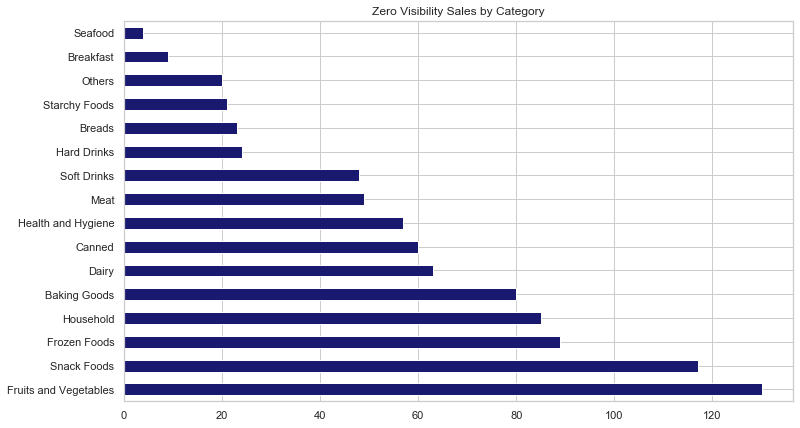

In [46]:
zero_vis_sales["Category"].value_counts().plot.barh(figsize=(12, 7), title='Zero Visibility Sales by Category', color='midnightblue')


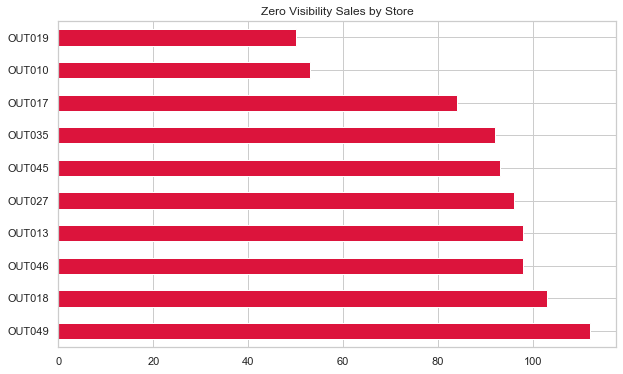

In [47]:
zero_vis_sales["Store_ID"].value_counts().plot.barh(figsize=(10, 6), title='Zero Visibility Sales by Store', color='crimson')

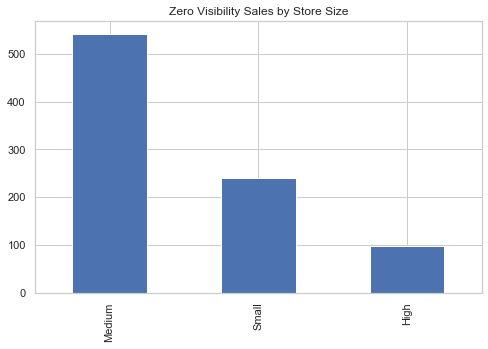

In [48]:
zero_vis_sales["Store_Size"].value_counts().plot.bar(figsize=(8, 5), title='Zero Visibility Sales by Store Size')

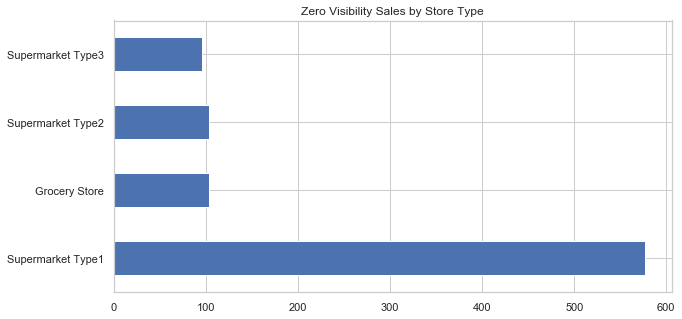

In [49]:

zero_vis_sales["Store_Type"].value_counts().plot.barh(figsize=(10, 5), title='Zero Visibility Sales by Store Type')

The highest amount of items with zero visibility seems to be coming from Type 1 Medium Supermarkets, fruit & vegetables products marked as low fat

In [50]:
low_vis_high_sales = Full_df[(Full_df["Visibility"] < 0.02) & (Full_df["Item_Store_Sales"] > 10000)]


In [51]:
high_vis_low_sales = Full_df[(Full_df["Visibility"] > 0.19) & (Full_df["Item_Store_Sales"] < 2000)]

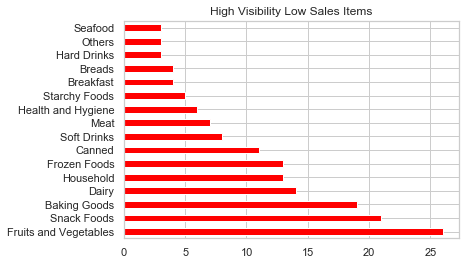

In [52]:
high_vis_low_sales["Category"].value_counts().plot.barh(figsize=(6, 4), title="High Visibility Low Sales Items" ,color='red')

Fruits and vegetables have high visibility but lower sales

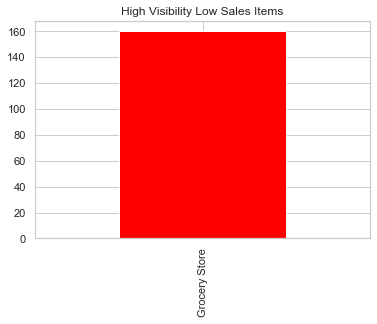

In [53]:
high_vis_low_sales["Store_Type"].value_counts().plot.bar(figsize=(6, 4), title="High Visibility Low Sales Items" ,color='red')

All the items with low visibility but high sales are from Grocery stores.

## Store Size

Text(0.5, 0, 'Store Type')

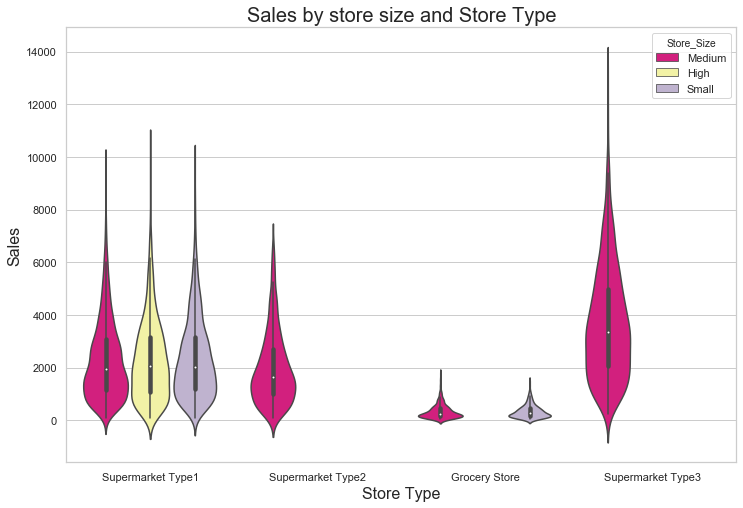

In [54]:
plt.figure(figsize=(12,8))
sns.violinplot(x='Store_Type', y='Item_Store_Sales', hue='Store_Size', data=Full_df, palette="Accent_r", ylim=(1,6))
plt.title('Sales by store size and Store Type', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store Type', fontsize=16)

## Weight

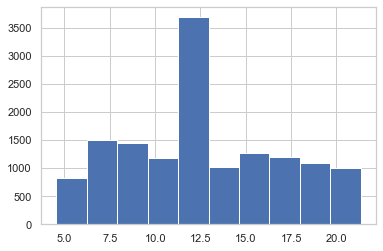

In [55]:
Full_df.Weight.hist(bins=10)

Text(0.5, 1.0, 'Weight_vs_sales_scatterplot')

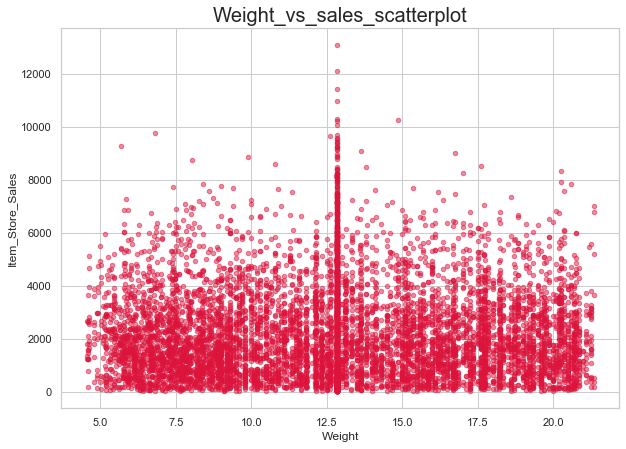

In [56]:
Full_df.plot(kind="scatter", x="Weight", y="Item_Store_Sales",
             alpha=0.5, figsize=(10, 7), color='crimson')
plt.title('Weight_vs_sales_scatterplot', fontsize=20)

## Store Establishment year

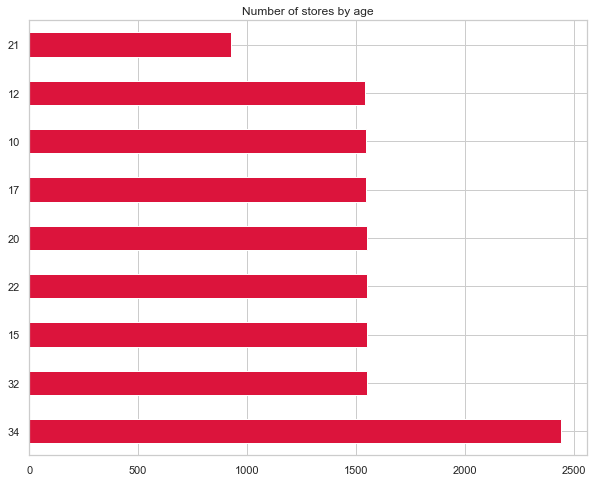

In [57]:
Full_df['Store_Age']=2019-Full_df['Store_Establishment_Year']
Full_df['Store_Age'].value_counts().plot.barh(figsize=(10, 8), title="Number of stores by age" ,color='crimson')

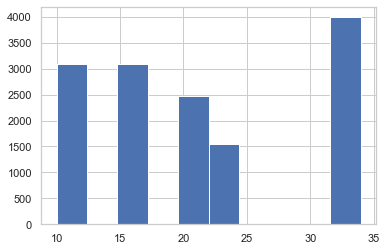

In [58]:
Full_df.Store_Age.hist(bins=10)

Period of 10 years where no new stores where created

Text(0.5, 0, 'Sales')

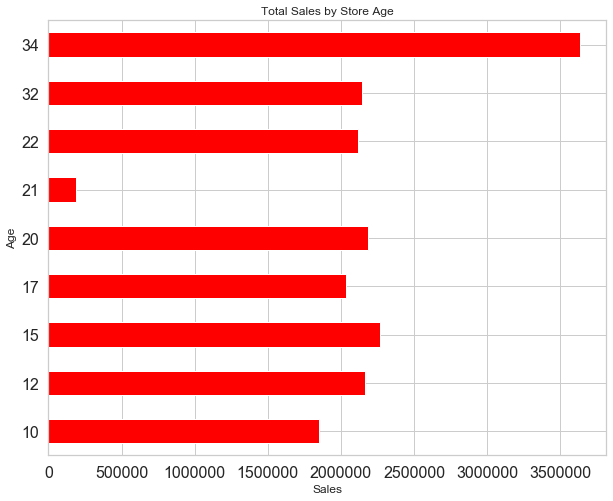

In [59]:
Sales_by_age=Full_df.groupby(["Store_Age"])['Item_Store_Sales'].sum()
Sales_by_age.plot.barh(figsize=(10,8), title="Total Sales by Store Age", color="red", fontsize=16)
plt.ylabel('Age')
plt.xlabel('Sales')

The oldest store has the highest number of sales

## Store location type

Text(0, 0.5, 'Frequency')

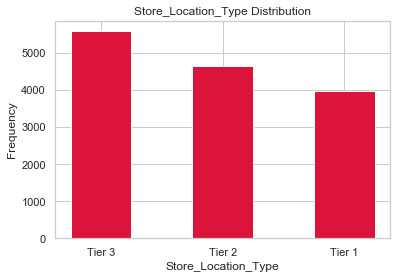

In [60]:
plt.bar(Full_df['Store_Location_Type'].value_counts().index, Full_df['Store_Location_Type'].value_counts(), width=0.5, bottom=None, align='center', data=Full_df, color='crimson')
plt.title('Store_Location_Type Distribution')
plt.xlabel('Store_Location_Type')
plt.ylabel('Frequency')

Text(0.5, 0, 'Sales')

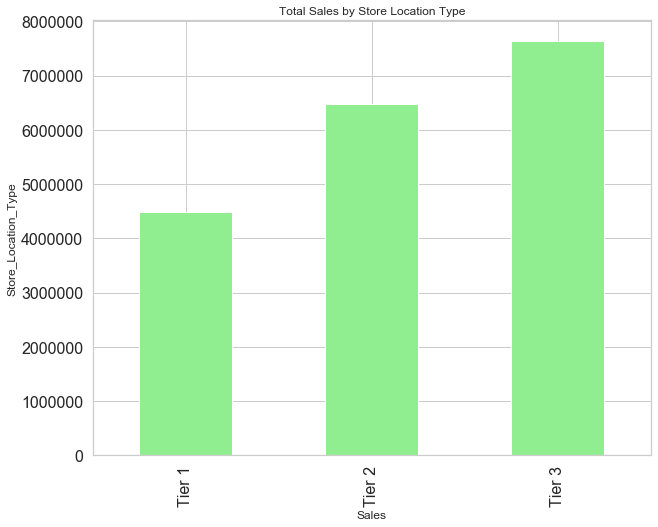

In [61]:
Sales_by_age=Full_df.groupby(["Store_Location_Type"])['Item_Store_Sales'].sum()
Sales_by_age.plot.bar(figsize=(10,8), title="Total Sales by Store Location Type", color="lightgreen", fontsize=16)
plt.ylabel('Store_Location_Type')
plt.xlabel('Sales')

Tier 3 location stores have the highest sales

Text(0.5, 1.0, 'Store Size by Store Type and Location Type')

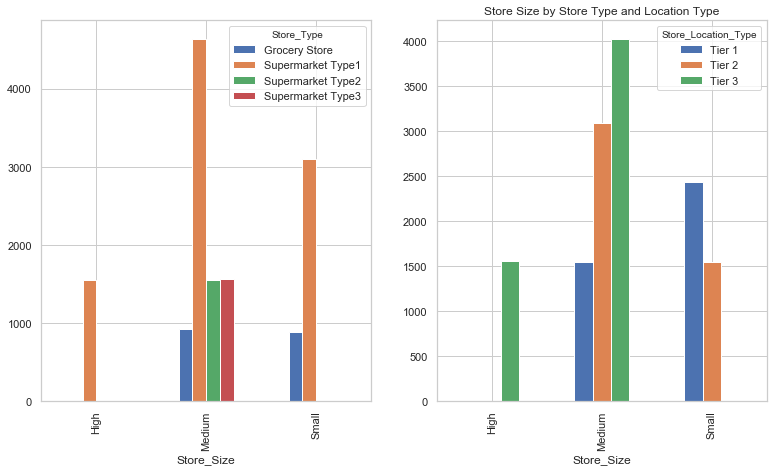

In [62]:
fig = plt.figure(figsize=(13,7))
ax1 = fig.add_subplot(121)
pd.crosstab(Full_df["Store_Size"], [Full_df["Store_Type"]]).plot.bar(ax=ax1)
ax2 = fig.add_subplot(122)
pd.crosstab(Full_df["Store_Size"], [Full_df["Store_Location_Type"]]).plot.bar(ax=ax2)
plt.title('Store Size by Store Type and Location Type')

Type1 and type 2 supermarkets are all medium in size. 
grocery stores are either medium or small. Large stores are located in tier3 environments which explins the high sales in tier 3 locations


In [63]:
Full_df.describe()

,Weight,Visibility,Max_Price,Store_Establishment_Year,Item_Store_Sales,Store_Age
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000
mean,12.792847,0.065953,141.004977,1997.830681,2181.288914,21.169319
std,4.234354,0.051459,62.086938,8.371664,1706.499616,8.371664
min,4.555000,0.000000,31.290000,1985.000000,33.290000,10.000000
25%,9.300000,0.027036,94.012000,1987.000000,834.247400,15.000000
50%,12.850000,0.054021,142.247000,1999.000000,1794.331000,20.000000
75%,16.000000,0.094037,185.855600,2004.000000,3101.296400,32.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,34.000000


# Model Building

In [64]:
Full_df.columns

Index(['Item_ID', 'Weight', 'FatContent', 'Visibility', 'Category',
       'Max_Price', 'Store_ID', 'Store_Establishment_Year', 'Store_Size',
       'Store_Location_Type', 'Store_Type', 'Item_Store_Sales', 'origin',
       'Category_Type', 'Store_Age'],
      dtype='object')

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
Full_df['Outlet'] = le.fit_transform(Full_df['Store_ID'])
var_mod = ['FatContent','Store_Location_Type','Store_Size','Category','Category_Type','Store_Type','Store_Age']
le = LabelEncoder()
for i in var_mod:
    Full_df[i] = le.fit_transform(Full_df[i])

In [66]:
#One Hot Coding:
Full_df = pd.get_dummies(Full_df, columns=['FatContent','Store_Location_Type','Store_Size','Category_Type','Store_Type','Store_Age'])

In [67]:
#Divide into test and train:
train = Full_df.loc[Full_df['origin']=="train"]
test = Full_df.loc[Full_df['origin']=="test"]



In [68]:
#Drop unnecessary columns:
test.drop(['Item_Store_Sales','origin'],axis=1,inplace=True)
train.drop(['origin'],axis=1,inplace=True)


C:\Users\rosan\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [69]:
#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [70]:
# Reading modified data
train = pd.read_csv("train_modified.csv")
test = pd.read_csv("test_modified.csv")

In [71]:
train.head(5)

,Item_ID,Weight,Visibility,Category,Max_Price,Store_ID,Store_Establishment_Year,Item_Store_Sales,Outlet,FatContent_0,...,Store_Type_3,Store_Age_0,Store_Age_1,Store_Age_2,Store_Age_3,Store_Age_4,Store_Age_5,Store_Age_6,Store_Age_7,Store_Age_8
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,3735.1380,9,1,...,0,0,0,0,0,1,0,0,0,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,443.4228,3,0,...,0,1,0,0,0,0,0,0,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,2097.2700,9,1,...,0,0,0,0,0,1,0,0,0,0
3,FDX07,19.20,0.000000,6,182.0950,OUT010,1998,732.3800,0,0,...,0,0,0,0,0,0,1,0,0,0
4,NCD19,8.93,0.000000,9,53.8614,OUT013,1987,994.7052,1,0,...,0,0,0,0,0,0,0,0,1,0


In [72]:
x_train = train.drop(['Item_Store_Sales', 'Store_ID','Item_ID'], axis=1)
y_train = train.Item_Store_Sales

In [73]:
x_test = test.drop(['Store_ID','Item_ID'], axis=1)

In [74]:
x_train.dtypes

Weight                      float64
Visibility                  float64
Category                      int64
Max_Price                   float64
Store_Establishment_Year      int64
Outlet                        int64
FatContent_0                  int64
FatContent_1                  int64
FatContent_2                  int64
Store_Location_Type_0         int64
Store_Location_Type_1         int64
Store_Location_Type_2         int64
Store_Size_0                  int64
Store_Size_1                  int64
Store_Size_2                  int64
Category_Type_0               int64
Category_Type_1               int64
Category_Type_2               int64
Store_Type_0                  int64
Store_Type_1                  int64
Store_Type_2                  int64
Store_Type_3                  int64
Store_Age_0                   int64
Store_Age_1                   int64
Store_Age_2                   int64
Store_Age_3                   int64
Store_Age_4                   int64
Store_Age_5                 

In [75]:
#Define target and ID columns:
target = 'Item_Store_Sales'
IDcol = ['Item_ID','Store_ID']

In [76]:
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation: for model evaluation
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
   
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])

## Linear Regression

In [77]:
# Fitting Multiple Linear Regression to the training set
from sklearn.linear_model import LinearRegression, Ridge
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
# Predicting the test set results
y_pred = regressor.predict(x_test)

y_pred

array([1845.95244771, 1573.92119237, 1873.7856607 , ..., 1808.87017039,
       3562.251397  , 1264.37267817])

In [79]:
import warnings
warnings.filterwarnings('ignore')
# Measuring Accuracy
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics




In [80]:
lr_accuracy = round(regressor.score(x_train,y_train) * 100,2)
lr_accuracy

56.35

In [81]:
r2_score(y_train, regressor.predict(x_train))

0.5635182030609818

In [82]:
import warnings
warnings.filterwarnings('ignore')
#Perform cross-validation:

cv_score = cross_val_score(regressor, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [83]:
print(np.sqrt(np.abs(cv_score)))

[1151.0942582  1118.65053424 1112.84707776 1126.58741438 1140.61903738]


In [84]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(x_train))))

RMSE : 1127



Model Report
CV Score : Mean - 1129 | Std - 43.31 | Min - 1075 | Max - 1211


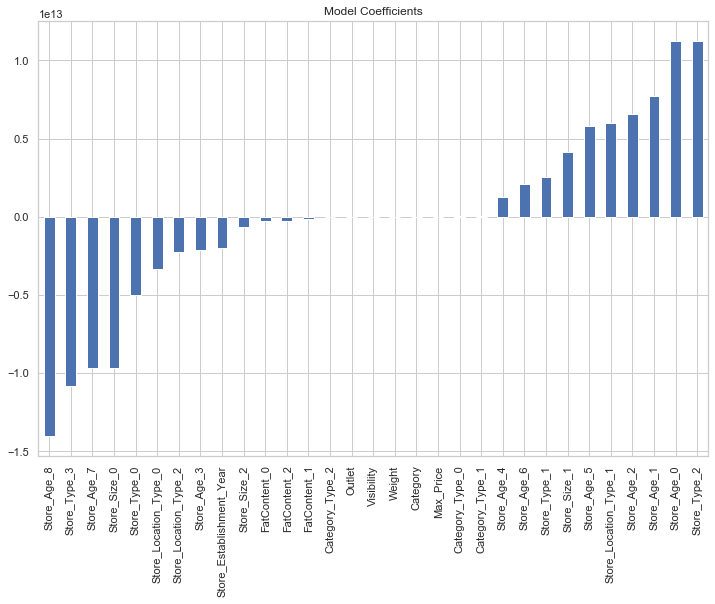

In [85]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg = LinearRegression(normalize=True)
modelfit(alg, train, test, predictors, target, IDcol, 'linear_regression_model')
coef = pd.Series(alg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients', figsize=(12, 8))

## Ridge Regression


Model Report
CV Score : Mean - 1130 | Std - 44.58 | Min - 1076 | Max - 1217


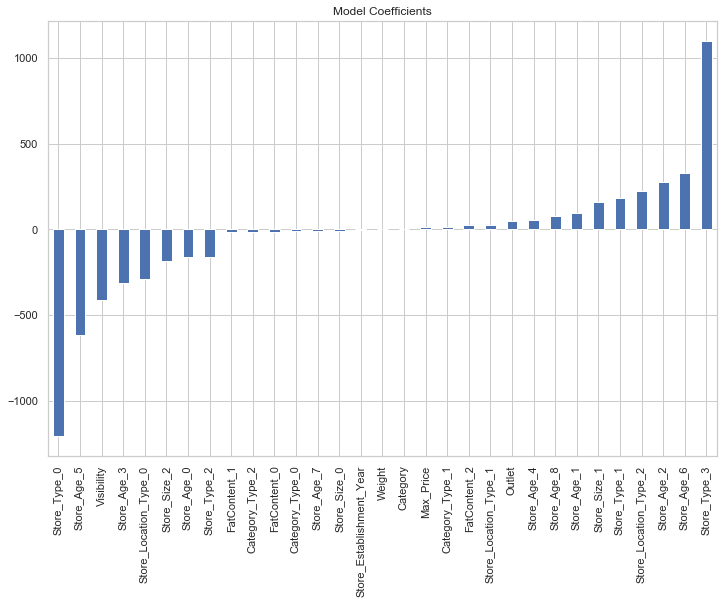

In [86]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg = Ridge(alpha=0.05,normalize=True)
modelfit(alg, train, test, predictors, target, IDcol, 'ridge_regression_model')
coef = pd.Series(alg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients', figsize=(12, 8))


## Decision Tree

In [87]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=300,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [88]:
# Predicting the test set results
y_pred = regressor.predict(x_test)
y_pred

array([1556.65096825, 1349.51290433,  471.30684669, ..., 1935.50411338,
       3805.94860417, 1349.51290433])

In [89]:
tree_accuracy = round(regressor.score(x_train,y_train),2)
tree_accuracy

0.59

In [90]:
r2_score(y_train, regressor.predict(x_train))

0.5883458477731257

In [91]:
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(np.sqrt(np.abs(cv_score)))

[1136.23452399 1115.31022624 1141.5447044  1105.70108903 1125.89661288]


In [92]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(x_train))))

RMSE : 1095



Model Report
CV Score : Mean - 1091 | Std - 44.28 | Min - 1015 | Max - 1173


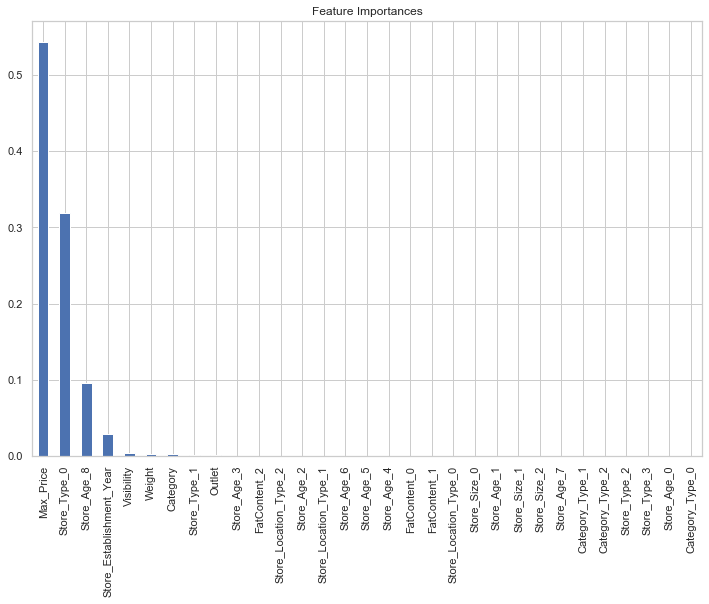

In [93]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg, train, test, predictors, target, IDcol, 'decision_tree_model_1')
coef = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importances', figsize=(12, 8))

Here you can see that the RMSE is 1058 and the mean CV error is 1091. This tells us that the model is slightly overfitting.


Model Report
CV Score : Mean - 1096 | Std - 43.3 | Min - 1027 | Max - 1172


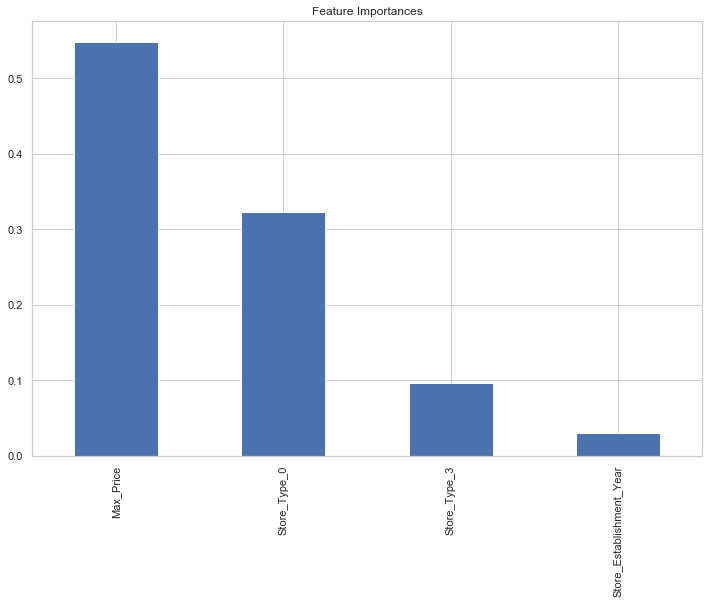

In [94]:
predictors = ['Max_Price','Store_Type_0','Store_Type_3','Store_Establishment_Year']
alg = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg, train, test, predictors, target, IDcol, 'decision_tree_model_2')
coef = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importances', figsize=(12, 8))

## Random Forest Model

In [95]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=50, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [96]:
# Predicting the test set results
y_pred = regressor.predict(x_test)
y_pred

array([1660.91130165, 1365.42667867,  613.23796476, ..., 1946.22711889,
       3694.68383229, 1312.75759289])

In [97]:
rf_accuracy = round(regressor.score(x_train,y_train),2)
rf_accuracy

0.61

In [98]:
r2_score(y_train, regressor.predict(x_train))

0.6132510455218914

In [99]:
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(np.sqrt(np.abs(cv_score)))

[1101.19961294 1076.69704607 1076.14971606 1070.68607801 1083.37964401]


In [100]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(x_train))))

RMSE : 1061



Model Report
CV Score : Mean - 1084 | Std - 43.74 | Min - 1021 | Max - 1162


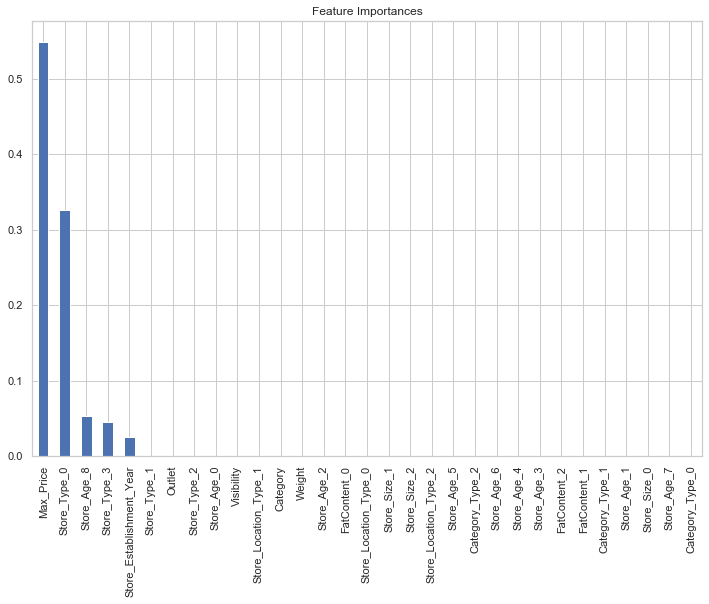

In [101]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg, train, test, predictors, target, IDcol, 'random_forest_model_1')
coef = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importances', figsize=(12, 8))

## Conclusion

Random Tree Model is the best model as it has an accuracy of 61%